In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## import dataset

In [2]:
dataset = pd.read_csv('employee.csv')
dataset = dataset.iloc[:, 1:126]

# tX = dataset.iloc[:, 2:124]
# tY = dataset.iloc[:, 125]
# X = dataset.iloc[:, 2:123].values #idや名前は除去(特徴量ではない)
# y = dataset.iloc[:, 125].values #output(0 or 1) 

In [3]:
dataset.head()

,GAME,COUNTRY,YEAR,NAPFLT,GOBFLT,SERAMY,NWYAMY,GASAMY,AEGFLT,TUNAMY,...,MARFLT,ROMFLT,EDIAMY,EDIFLT,LONAMY,NAPAMY,NAOFLT,MUNAMY,LONFLT,OUTPUT
0,1.0,RUS,1901,[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],4.0
1,1.0,AUS,1901,[],[],AUS,[],[],[],[],...,[],[],[],[],[],[],[],[],[],4.0
2,1.0,GER,1901,[],[],AUS,[],[],[],[],...,[],[],[],[],[],[],[],[],[],4.0
3,1.0,TUR,1901,[],[],AUS,[],[],[],[],...,[],[],[],[],[],[],[],[],[],4.0
4,1.0,FRA,1901,[],[],AUS,[],[],[],[],...,[],[],[],[],[],[],[],FRA,[],6.0


国別に分けて, outputのデータを最終年の補給地の数にする

In [7]:
rus_dataset = dataset[dataset.COUNTRY == 'RUS']
aus_dataset = dataset[dataset.COUNTRY == 'AUS']
ger_dataset = dataset[dataset.COUNTRY == 'GER']
tur_dataset = dataset[dataset.COUNTRY == 'TUR']
fra_dataset = dataset[dataset.COUNTRY == 'FRA']
eng_dataset = dataset[dataset.COUNTRY == 'ENG']
ita_dataset = dataset[dataset.COUNTRY == 'ITA']

In [22]:
eng_dataset.head()

,GAME,COUNTRY,YEAR,NAPFLT,GOBFLT,SERAMY,NWYAMY,GASAMY,AEGFLT,TUNAMY,...,MARFLT,ROMFLT,EDIAMY,EDIFLT,LONAMY,NAPAMY,NAOFLT,MUNAMY,LONFLT,OUTPUT
5,1.0,ENG,1901,[],[],AUS,[],[],[],[],...,[],[],[],[],[],[],[],FRA,[],3.0
12,1.0,ENG,1902,[],RUS,AUS,[],[],TUR,[],...,[],[],[],[],[],[],[],FRA,[],4.0
19,1.0,ENG,1903,[],RUS,AUS,[],[],TUR,[],...,[],[],[],[],[],[],[],FRA,[],4.0
26,1.0,ENG,1904,[],RUS,AUS,[],FRA,TUR,[],...,[],[],[],[],ENG,[],[],FRA,[],3.0
33,1.0,ENG,1905,FRA,RUS,AUS,[],FRA,TUR,[],...,[],[],[],[],ENG,[],[],FRA,[],3.0


In [31]:
from sklearn.utils import shuffle

In [100]:
tX = eng_dataset.iloc[:, 0:124]
tX = shuffle(tX)
tX = tX.drop_duplicates('GAME')
tX = tX.sort_values('GAME').iloc[:, 2:124]
tY = eng_dataset.drop_duplicates('GAME', keep = 'last').iloc[:,124]

In [151]:
tX.head()

,YEAR,NAPFLT,GOBFLT,SERAMY,NWYAMY,GASAMY,AEGFLT,TUNAMY,NWYFLT,GASFLT,...,GALAMY,MARFLT,ROMFLT,EDIAMY,EDIFLT,LONAMY,NAPAMY,NAOFLT,MUNAMY,LONFLT
26,1904,[],RUS,AUS,[],FRA,TUR,[],RUS,[],...,GER,[],[],[],[],ENG,[],[],FRA,[]
68,1903,FRA,RUS,TUR,[],FRA,TUR,[],ENG,[],...,RUS,[],[],[],[],ENG,[],ENG,GER,ENG
194,1906,ITA,RUS,TUR,RUS,FRA,TUR,[],ENG,[],...,AUS,[],ITA,ENG,ENG,ENG,ITA,ENG,FRA,FRA
236,1901,ITA,RUS,AUS,RUS,RUS,TUR,[],ENG,[],...,RUS,ITA,ITA,ENG,ENG,ENG,ITA,ENG,RUS,ENG
397,1908,ITA,RUS,RUS,RUS,FRA,TUR,[],ENG,ITA,...,RUS,ITA,ITA,ENG,ENG,ENG,ITA,FRA,GER,ENG


In [152]:
tY.head()

47      3.0
152     4.0
229     5.0
341    10.0
460     4.0
Name: OUTPUT, dtype: float64

In [153]:
print(tX.shape,tY.shape)

(1589, 122) (1589,)


In [170]:
X = tX.values
y = tY.values

## Encoding categorical data
データの成形を行う

In [171]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

##labelをエンコードする
le = LabelEncoder()
le.fit(['RUS','AUS','GER','TUR','FRA','ENG', 'ITA', '[]'])

for i in range(121):
    X[:, i+1] = le.transform(X[:, i+1])

### Gender
# labelencoder_X_2 = LabelEncoder()
# X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2]) 

In [172]:
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()

##  データセットと学習セットに分ける

In [173]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

In [175]:
print(X_train.shape)

(1271, 128)


# モデルの作成

In [176]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense 

In [177]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu', input_dim = 128))
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 

In [178]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100) 

Epoch 1/100
1271/1271 [==============================] - 0s - loss: -3.0794 - acc: 0.1991     
Epoch 2/100
1271/1271 [==============================] - 0s - loss: -44.5491 - acc: 0.2006     

In [166]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5) 

In [167]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 

[[60  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [36  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [43  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


In [168]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label') 

Normalized confusion matrix
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.

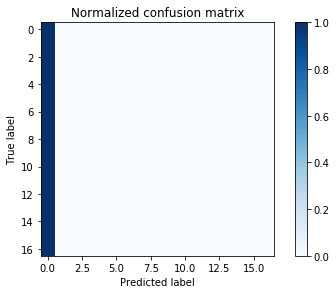

In [169]:
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
plt.show() 